<a href="https://colab.research.google.com/github/GrandMoff100/MLCamp2022/blob/main/RandomForestWithIrisSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np


df = pd.read_csv("https://raw.githubusercontent.com/lynn0032/MLCamp2021/main/iris.csv")

features = ["sepal_length", "sepal_width", "petal_width", "petal_length"]
X = df[features]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


In [137]:
def random_tree(size):
    clf = RandomForestClassifier(n_estimators=size, max_depth=2, ccp_alpha=0.1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

size_list = list(range(5, 300))
scores = list(map(random_tree, size_list))

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


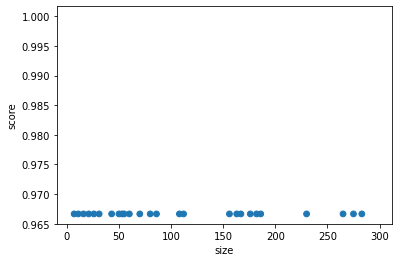

In [151]:
# Visualize when increases in estimator size lead to an increase in accuracy
pd.DataFrame(list(zip(size_list, scores, [(scores[i + 1] - score) * 1000 for i, score in enumerate(scores[:-2])])), columns=["size", "score", "increase"]).plot.scatter(x="size", y="score", s="increase")

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

def visualize_estimator(estimator):
    dot_data = export_graphviz(estimator, out_file=None)
    display(graphviz.Source(dot_data))
